
╔════════════════════════════════════════════════════════════════════════════╗
║                 📊 Strategic Systemic Risk Analysis in Banking Sector     ║
║                      using PCA, MST, and Intra-Market Beta                 ║
║                                                                            ║
║     📝 Inspired by: "An Early-Warning Risk Signals Framework              ║
║                   to Capture Systematic Risk in Financial Markets"         ║
║                   — Vito Ciciretti, 2025                                   ║
║                                                                            ║
║     🔐 Developed by: Parisa Akhavan Armaki                                ║
║     📅 Date: August 2025                                                  ║
╚════════════════════════════════════════════════════════════════════════════╝

✅ Saman added.
✅ Pasargad added.
✅ Khavarmianeh added.
⚠️ Ayandeh has insufficient return variance. Skipped.
✅ Karafarin added.
✅ Parsian

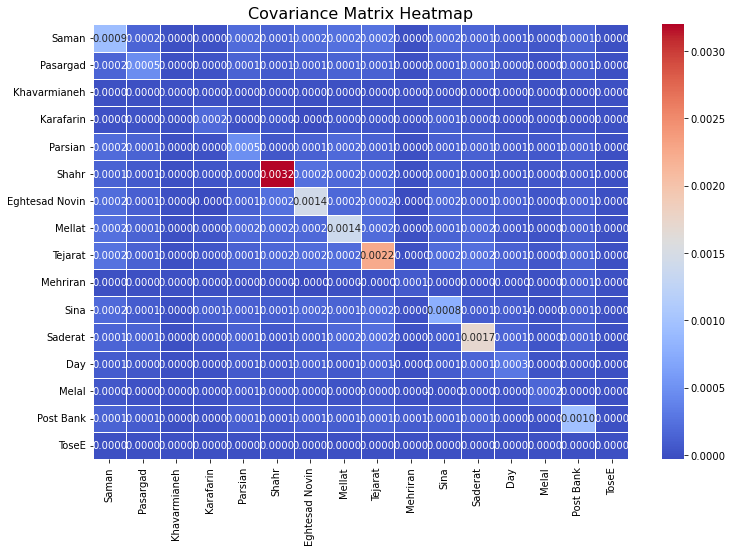


🔗 Eigenvector Centrality:
Saman: 0.4333
Pasargad: 0.2521
Karafarin: 0.0713
Parsian: 0.6280
Shahr: 0.0535
Eghtesad Novin: 0.1676
Mellat: 0.2297
Tejarat: 0.1483
Mehriran: 0.1119
Sina: 0.1852
Saderat: 0.0934
Day: 0.2589
Melal: 0.2285
Post Bank: 0.2622

 Standard Deviation of Eigenvector Centrality:  0.147100


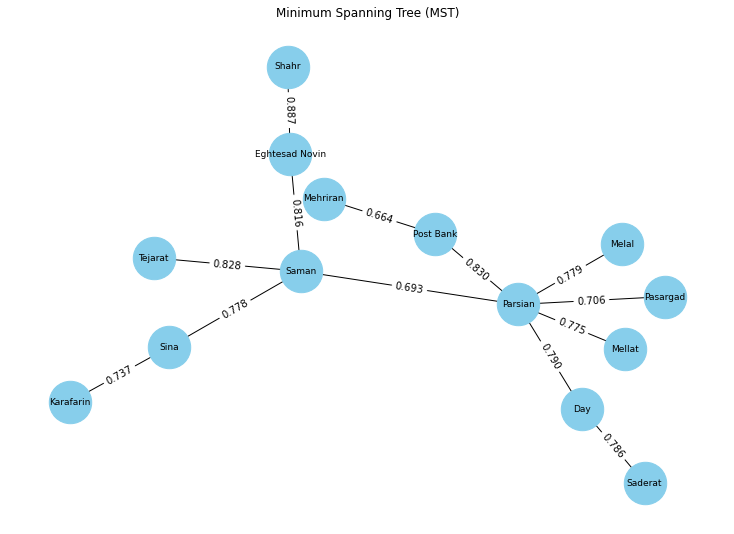


📌 PC1 Contribution:
          Bank  PC1 Weight
         Shahr    0.874728
       Tejarat    0.297696
Eghtesad Novin    0.201272
        Mellat    0.179086
         Saman    0.145915
       Saderat    0.139371
          Sina    0.102955
     Post Bank    0.083259
      Pasargad    0.075965
       Parsian    0.073472
           Day    0.055527
         Melal    0.027164
     Karafarin    0.020136
      Mehriran    0.001484
  Khavarmianeh    0.000000
         ToseE    0.000000

🏷️ Systemic Role of Banks:
Shahr: Systemic Contributor (0.8747)
Tejarat: Systemic Follower (0.2977)
Eghtesad Novin: Systemic Follower (0.2013)
Mellat: Peripheral/Neutral (0.1791)
Saman: Peripheral/Neutral (0.1459)
Saderat: Peripheral/Neutral (0.1394)
Sina: Peripheral/Neutral (0.1030)
Post Bank: Peripheral/Neutral (0.0833)
Pasargad: Peripheral/Neutral (0.0760)
Parsian: Peripheral/Neutral (0.0735)
Day: Peripheral/Neutral (0.0555)
Melal: Peripheral/Neutral (0.0272)
Karafarin: Peripheral/Neutral (0.0201)
Mehriran: Per

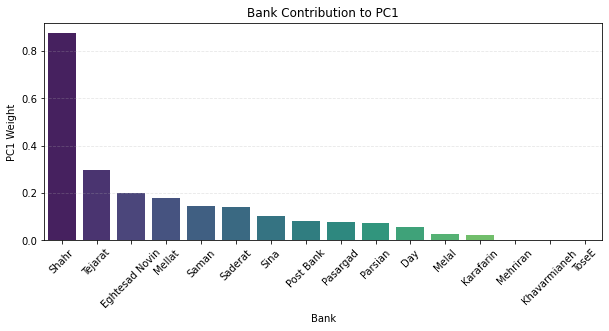


📌 Intra-Market Beta:
          Bank     Beta
         Shahr 2.328082
       Tejarat 2.163492
       Saderat 1.643877
        Mellat 1.613715
Eghtesad Novin 1.569369
         Saman 1.458824
          Sina 1.131385
     Post Bank 1.104782
       Parsian 0.950128
      Pasargad 0.849611
           Day 0.606762
         Melal 0.270777
     Karafarin 0.266249
      Mehriran 0.084941
  Khavarmianeh 0.000000
         ToseE 0.000000


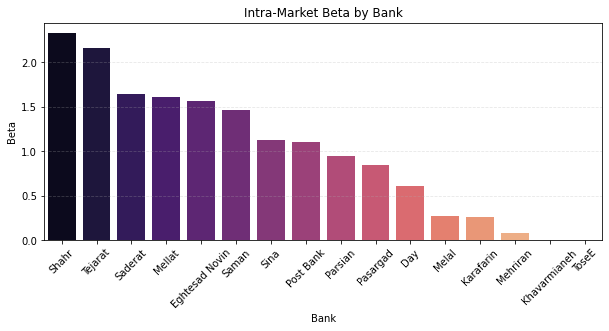


📌 Systemic Risk Summary:

1. std of Eigenvector Centrality:  0.147100
   → Shows concentration/distribution of systematic influence.

2. Largest Eigenvalue: 0.003410

3. Variance Explained by 2nd-5th Eigenvalues:  49.10%
   → Represents additional systematic or sectorial contributions.
   → High eigenvalue indicates concentrated risk.

4. Variance Explained by PC1: 23.85%
   → Dominance of PC1 reflects market sensitivity.

5. Bias Mimicking Index: 0.4235
   → Higher values show structural vulnerability.

6. Eigenvalue Spread (1st - 2nd): 0.000829
   → Large spread means one dominant systemic factor.

🧠 Interpretation for Decision-Makers:
✅ Systemic risk is moderate. Current diversification appears sufficient.


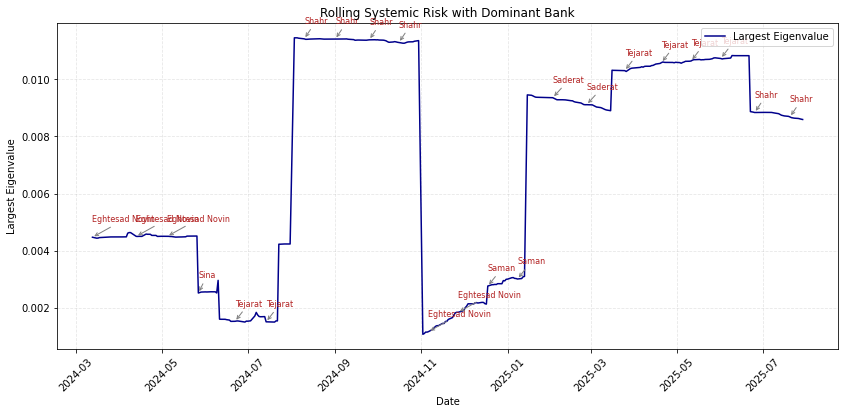

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import os
import tkinter as tk
from tkinter import scrolledtext 

# ===============================

print("""
╔════════════════════════════════════════════════════════════════════════════╗
║                 📊 Strategic Systemic Risk Analysis in Banking Sector     ║
║                      using PCA, MST, and Intra-Market Beta                 ║
║                                                                            ║
║     📝 Inspired by: "An Early-Warning Risk Signals Framework              ║
║                   to Capture Systematic Risk in Financial Markets"         ║
║                   — Vito Ciciretti, 2025                                   ║
║                                                                            ║
║     🔐 Developed by: Parisa Akhavan Armaki                                ║
║     📅 Date: August 2025                                                  ║
╚════════════════════════════════════════════════════════════════════════════╝
""")



# ===============================

# 🧼 تابع پاکسازی داده و محاسبه بازده
def clean_and_compute_return(csv_file, ticker_name):
    df = pd.read_csv(csv_file)[["<DTYYYYMMDD>", "<CLOSE>"]].copy()
    df.columns = ["Date", ticker_name]
    df["Date"] = pd.to_datetime(df["Date"].astype(str))
    df = df[df[ticker_name] > 0].dropna()
    df = df.sort_values("Date").reset_index(drop=True)
    df[ticker_name] = df[ticker_name].pct_change()
    return df.dropna().reset_index(drop=True)

# ===============================
# 📁 لیست فایل‌ها و برچسب‌ها
files_and_labels = [
    ("Saman Bank.csv", "Saman"),
    ("S_Pasargad Bank.csv", "Pasargad"),
    ("Bank of M.E.-R.csv", "Khavarmianeh"),
    ("Ayandeh Bank.csv", "Ayandeh"),
    ("Karafarin Bank.csv", "Karafarin"),
    ("Parsian Bank.csv", "Parsian"),
    ("S_City Bank.csv", "Shahr"),
    ("S_EN Bank.csv", "Eghtesad Novin"),
    ("S_Mellat Bank.csv", "Mellat"),
    ("S_Tejarat Bank.csv", "Tejarat"),
    ("MehrIran.QAH250304.csv", "Mehriran"),
    ("Sina Fin. Ins..csv", "Sina"),
    ("Saderat Bank.csv", "Saderat"),
    ("Day Bank.csv", "Day"),
    ("Melal Credit Inst..csv", "Melal"),
    ("Post Bank.csv", "Post Bank"),
    ("Etebari Dev Co.csv", "ToseE")
    
]

# ===============================
# 🔗 ترکیب داده‌ها
returns = None
for file, label in files_and_labels:
    if not os.path.exists(file):
        print(f"❌ File not found: {file}")
        continue
    try:
        df = clean_and_compute_return(file, label)
        if df[label].std() > 1e-6:
            returns = df if returns is None else returns.merge(df, on="Date")
            print(f"✅ {label} added.")
        else:
            print(f"⚠️ {label} has insufficient return variance. Skipped.")
    except Exception as e:
        print(f"⚠️ Error processing {label}: {e}")

# ===============================
# 🚦 ادامه فقط اگر داده داریم
if returns is None or returns.shape[1] <= 2:
    print("⚠️ Not enough valid assets for analysis.")
else:
    returns_only = returns.drop("Date", axis=1)
    banks = returns_only.columns

    # -----------------------------
    # 🎯 Covariance Matrix Heatmap
    cov_matrix = returns_only.cov()
    plt.figure(figsize=(12, 8))
    sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
    plt.title("Covariance Matrix Heatmap", fontsize=16)
    plt.show()

    # -----------------------------
    # 🌐 Minimum Spanning Tree (MST)
    distance = 1 - returns_only.corr()
    G = nx.Graph()
    for i in distance.columns:
        for j in distance.index:
            if i != j and not np.isnan(distance.loc[i, j]):
                G.add_edge(i, j, weight=distance.loc[i, j])
    mst = nx.minimum_spanning_tree(G)

    # مرکزیت
    for u, v, d in mst.edges(data=True):
        d['weight'] = 1 / (d['weight'] + 1e-6)
    centrality = nx.eigenvector_centrality(mst, weight='weight')
    print("\n🔗 Eigenvector Centrality:")
    for k, v in centrality.items():
        print(f"{k}: {v:.4f}")
    std_centrality = np.std (list(centrality.values()))    
    print (f"\n Standard Deviation of Eigenvector Centrality: {std_centrality: .6f}")

    # نمودار MST
    pos = nx.spring_layout(mst, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(mst, pos, with_labels=True, node_color='skyblue', node_size=1800, font_size= 9)
    edge_labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels={k: f"{1/v:.3f}" for k, v in edge_labels.items()})
    plt.title("Minimum Spanning Tree (MST)")
    plt.show()

    # -----------------------------
    # 📊 Principal Component Analysis (PCA)
    cov = np.cov(returns_only.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    variance_explained = eigenvalues / np.sum(eigenvalues)
    variance_explained_2_to_5 = np.sum(eigenvalues[1:5])/np.sum(eigenvalues)

    largest_eigenvalue = eigenvalues[0]
    largest_variance_explained = variance_explained[0]
    bias_mimicking_stat = (eigenvalues[0] ** 2) / np.sum(eigenvalues ** 2)
    eigenvalue_spread = eigenvalues[0] - eigenvalues[1]

    pc1_vector = eigenvectors[:, 0]
    pc1_df = pd.DataFrame({
        "Bank": banks,
        "PC1 Weight": pc1_vector
    }).sort_values("PC1 Weight", key=abs, ascending=False)

    print("\n📌 PC1 Contribution:")
    print(pc1_df.to_string(index=False))

    # 🎯 Systemic Role Categorization
    roles = []
    for w in pc1_df["PC1 Weight"].abs():
        if w >= 0.4:
            roles.append("Systemic Contributor")
        elif w >= 0.2:
            roles.append("Systemic Follower")
        else:
            roles.append("Peripheral/Neutral")
    pc1_df["Systemic Role"] = roles

    print("\n🏷️ Systemic Role of Banks:")
    for _, row in pc1_df.iterrows():
        print(f"{row['Bank']}: {row['Systemic Role']} ({row['PC1 Weight']:.4f})")

    # 📊 Bar Chart PC1
    plt.figure(figsize=(10, 4))
    sns.barplot(data=pc1_df, x="Bank", y="PC1 Weight", palette="viridis")
    plt.title("Bank Contribution to PC1")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.show()

    # -----------------------------
    # 📉 Intra-Market Beta Calculation
    market_return = returns_only.mean(axis=1)
    betas = {}
    for bank in banks:
        r = returns_only[bank]
        beta = np.cov(r, market_return)[0, 1] / np.var(market_return)
        betas[bank] = beta

    beta_df = pd.DataFrame(list(betas.items()), columns=["Bank", "Beta"]).sort_values("Beta", ascending=False)
    print("\n📌 Intra-Market Beta:")
    print(beta_df.to_string(index=False))

    plt.figure(figsize=(10, 4))
    sns.barplot(data=beta_df, x="Bank", y="Beta", palette="magma")
    plt.title("Intra-Market Beta by Bank")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.show()

    # -----------------------------
   # 📌 بخش ۵: تحلیل نهایی
    print("\n📌 Systemic Risk Summary:")
    print(f"\n1. std of Eigenvector Centrality: {std_centrality: .6f}")
    print("   → Shows concentration/distribution of systematic influence.")
    print(f"\n2. Largest Eigenvalue: {largest_eigenvalue:.6f}")
    print(f"\n3. Variance Explained by 2nd-5th Eigenvalues: {variance_explained_2_to_5: .2%}")
    print("   → Represents additional systematic or sectorial contributions.")
    print("   → High eigenvalue indicates concentrated risk.")
    print(f"\n4. Variance Explained by PC1: {largest_variance_explained:.2%}")
    print("   → Dominance of PC1 reflects market sensitivity.")
    print(f"\n5. Bias Mimicking Index: {bias_mimicking_stat:.4f}")
    print("   → Higher values show structural vulnerability.")
    print(f"\n6. Eigenvalue Spread (1st - 2nd): {eigenvalue_spread:.6f}")
    print("   → Large spread means one dominant systemic factor.")
    print("\n🧠 Interpretation for Decision-Makers:")
    if largest_variance_explained > 0.5 and bias_mimicking_stat > 0.6:
        print("⚠️ Systemic risk is elevated. Recommend reviewing diversification and stress scenarios.")
    else:
        print("✅ Systemic risk is moderate. Current diversification appears sufficient.")

    # -----------------------------
    # ⏱️ Rolling PCA Over Time
    window_size = 60
    rolling_eigenvalues = []
    rolling_pc1 = []
    rolling_dates = []

    for i in range(len(returns_only) - window_size + 1):
        window_data = returns_only.iloc[i:i+window_size]
        window_date = returns["Date"].iloc[i + window_size - 1]
        cov = np.cov(window_data.T)
        eigvals, eigvecs = np.linalg.eig(cov)
        idx = np.argsort(eigvals)[::-1]
        eigvals = eigvals[idx]
        eigvecs = eigvecs[:, idx]
        rolling_eigenvalues.append(eigvals[0])
        rolling_pc1.append(eigvecs[:, 0])
        rolling_dates.append(window_date)

    rolling_df = pd.DataFrame({
        "Date": rolling_dates,
        "Largest Eigenvalue": rolling_eigenvalues
    })

    dominant_banks = []
    for weights in rolling_pc1:
        dominant_banks.append(banks[np.argmax(np.abs(weights))])
    rolling_df["Dominant Bank"] = dominant_banks

    # 📈 Plot Rolling Eigenvalue with Annotations
    plt.figure(figsize=(14, 6))
    plt.plot(rolling_df["Date"], rolling_df["Largest Eigenvalue"], color="darkblue", label="Largest Eigenvalue")
    for idx, row in rolling_df.iterrows():
        if idx % 15 == 0:
            plt.annotate(f"{row['Dominant Bank']}", xy=(row["Date"], row["Largest Eigenvalue"]),
                         xytext=(0, 15), textcoords='offset points',
                         fontsize=8, color='firebrick',
                         arrowprops=dict(arrowstyle="->", color='gray', lw=1))
    plt.title("Rolling Systemic Risk with Dominant Bank")
    plt.xlabel("Date")
    plt.ylabel("Largest Eigenvalue")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(rotation=45)
    plt.show()
